# Predicting Customer Satisfaction


##1. Installing and Importing Libraries

In [ ]:
!pip install lightgbm
!pip install datetime
!pip install plotly
!pip install more_itertools
!pip install imblearn
!pip install fast_ml
!pip install xgboost
!pip install optuna
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 8.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fast_ml.utilities import display_all
from fast_ml import eda
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import datetime as dt
from scipy import stats
from more_itertools import unique_everseen
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import optuna
import pickle

##2. Data Loading & Analysis

In [ ]:
orders_df = pd.read_csv('olist_orders_dataset.csv', engine='python')
order_items = pd.read_csv('olist_order_items_dataset.csv', engine='python')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', engine='python')
products = pd.read_csv('olist_products_dataset.csv', engine='python')
product_category = pd.read_csv('product_category_name_translation.csv', engine='python')
customer = pd.read_csv('olist_customers_dataset.csv', engine='python')
payments = pd.read_csv('olist_order_payments_dataset.csv', engine='python')
sellers = pd.read_csv('olist_sellers_dataset.csv', engine='python')

In [ ]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
order_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [ ]:
order_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [ ]:
products.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [ ]:
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [ ]:
product_category.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [ ]:
product_category.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

In [ ]:
customer.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [ ]:
payments.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [ ]:
categories = products.merge(product_category, on = 'product_category_name', how = 'left')

In [ ]:
categories

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [ ]:
sellers.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [ ]:
orders = pd.merge(order_reviews, order_items, how = 'left', on = 'order_id')
orders = pd.merge(orders, orders_df, how = 'left', on = 'order_id')
orders = pd.merge(orders, customer, how = 'left', on = 'customer_id')
orders = pd.merge(orders, categories, how = 'left', on = 'product_id')
orders = pd.merge(orders, sellers, how = 'left', on = 'seller_id')
orders = pd.merge(orders, payments, how = 'left', on = 'order_id')

In [ ]:
orders.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,30.0,35.0,sports_leisure,14600.0,sao joaquim da barra,SP,1.0,credit_card,8.0,397.26
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,30.0,35.0,sports_leisure,14600.0,sao joaquim da barra,SP,1.0,credit_card,8.0,397.26
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,14.0,14.0,computers_accessories,12233.0,sao jose dos campos,SP,1.0,credit_card,1.0,88.09
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,20.0,20.0,computers_accessories,37175.0,ilicinea,MG,1.0,credit_card,1.0,194.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,20.0,20.0,garden_tools,37175.0,ilicinea,MG,1.0,credit_card,1.0,222.84
5,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,...,35.0,50.0,sports_leisure,81730.0,curitiba,PR,1.0,credit_card,10.0,1333.25
6,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37,1.0,c45d02cc82cd779835094de9b29272cb,da8622b14eb17ae2831f4ac5b9dab84a,...,6.0,36.0,bed_bath_table,13405.0,piracicaba,SP,1.0,credit_card,1.0,462.70
7,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37,2.0,c45d02cc82cd779835094de9b29272cb,da8622b14eb17ae2831f4ac5b9dab84a,...,6.0,36.0,bed_bath_table,13405.0,piracicaba,SP,1.0,credit_card,1.0,462.70
8,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37,3.0,4e3550b4ebca5e32ccc3d32b3470e31f,41ab63a91b8b264e8c8780368bf1dd5b,...,22.0,17.0,bed_bath_table,31555.0,belo horizonte,MG,1.0,credit_card,1.0,462.70
9,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37,4.0,c45d02cc82cd779835094de9b29272cb,da8622b14eb17ae2831f4ac5b9dab84a,...,6.0,36.0,bed_bath_table,13405.0,piracicaba,SP,1.0,credit_card,1.0,462.70


In [ ]:
orders.shape

(118146, 40)

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118146 entries, 0 to 118145
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      118146 non-null  object 
 1   order_id                       118146 non-null  object 
 2   review_score                   118146 non-null  int64  
 3   review_comment_title           13989 non-null   object 
 4   review_comment_message         50245 non-null   object 
 5   review_creation_date           118146 non-null  object 
 6   review_answer_timestamp        118146 non-null  object 
 7   order_item_id                  117332 non-null  float64
 8   product_id                     117332 non-null  object 
 9   seller_id                      117332 non-null  object 
 10  shipping_limit_date            117332 non-null  object 
 11  price                          117332 non-null  float64
 12  freight_value                 

In [ ]:
sum(orders.duplicated())

0

In [ ]:
orders.describe()

,review_score,order_item_id,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,118146.000000,117332.000000,117332.000000,117332.000000,118146.000000,115637.000000,115637.000000,115637.000000,117312.000000,117312.000000,117312.000000,117312.000000,117332.000000,118143.000000,118143.000000,118143.000000
mean,4.015582,1.194141,120.522417,20.027075,35041.333994,48.767635,785.809352,2.205497,2110.734656,30.254092,16.612461,23.071271,24452.248543,1.095139,2.938050,172.204038
std,1.400436,0.684241,182.942903,15.828114,29847.490879,10.033983,652.375747,1.717772,3785.084700,16.177472,13.452453,11.745779,27583.536615,0.732782,2.775373,266.016169
min,1.000000,1.000000,0.850000,0.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,0.000000,0.000000
25%,4.000000,1.000000,39.900000,13.080000,11250.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,1.000000,1.000000,60.730000
50%,5.000000,1.000000,74.900000,16.280000,24240.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,1.000000,2.000000,108.000000
75%,5.000000,1.000000,134.900000,21.180000,58703.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28470.000000,1.000000,4.000000,189.005000
max,5.000000,21.000000,6735.000000,409.680000,99990.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,29.000000,24.000000,13664.080000


In [ ]:
orders.isnull().sum()

review_id                             0
order_id                              0
review_score                          0
review_comment_title             104157
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
order_item_id                       814
product_id                          814
seller_id                           814
shipping_limit_date                 814
price                               814
freight_value                       814
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   172
order_delivered_carrier_date       2048
order_delivered_customer_date      3285
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
product_category_name              2509


In [ ]:
orders.isnull().sum() / orders.shape[0]

review_id                        0.000000
order_id                         0.000000
review_score                     0.000000
review_comment_title             0.881596
review_comment_message           0.574721
review_creation_date             0.000000
review_answer_timestamp          0.000000
order_item_id                    0.006890
product_id                       0.006890
seller_id                        0.006890
shipping_limit_date              0.006890
price                            0.006890
freight_value                    0.006890
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001456
order_delivered_carrier_date     0.017334
order_delivered_customer_date    0.027805
order_estimated_delivery_date    0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp).dt.date
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at).dt.date
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date).dt.date
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date).dt.date
orders['review_answer_timestamp'] = pd.to_datetime(orders.review_answer_timestamp).dt.date
orders['review_creation_date'] = pd.to_datetime(orders.review_answer_timestamp).dt.date

In [ ]:
orders

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,30.0,35.0,sports_leisure,14600.0,sao joaquim da barra,SP,1.0,credit_card,8.0,397.26
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,30.0,35.0,sports_leisure,14600.0,sao joaquim da barra,SP,1.0,credit_card,8.0,397.26
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-11,2018-03-11,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,14.0,14.0,computers_accessories,12233.0,sao jose dos campos,SP,1.0,credit_card,1.0,88.09
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-18,2018-02-18,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,20.0,20.0,computers_accessories,37175.0,ilicinea,MG,1.0,credit_card,1.0,194.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,20.0,20.0,garden_tools,37175.0,ilicinea,MG,1.0,credit_card,1.0,222.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118141,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-14,2018-07-14,1.0,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,...,25.0,25.0,furniture_decor,9270.0,santo andre,SP,1.0,credit_card,8.0,287.97
118142,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-11,2017-12-11,1.0,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,...,27.0,19.0,toys,22240.0,rio de janeiro,RJ,1.0,credit_card,1.0,209.76
118143,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-23,2018-03-23,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,...,37.0,29.0,stationery,32677.0,betim,MG,1.0,credit_card,6.0,231.56
118144,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-02,2018-07-02,1.0,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,...,10.0,11.0,sports_leisure,9780.0,sao bernardo do campo,SP,1.0,credit_card,1.0,66.41


In [ ]:
orders = orders[['customer_unique_id', 'order_status', 'price', 'order_purchase_timestamp',
                 'order_approved_at','order_estimated_delivery_date',
                 'order_delivered_customer_date',
                 'freight_value', 'order_item_id', 'customer_city',
                'customer_state', 'product_weight_g', 'product_length_cm',
                 'product_height_cm', 'product_width_cm',
                 'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                 'payment_sequential' ,'payment_type', 'payment_installments', 'payment_value',
                 'review_creation_date', 'review_answer_timestamp', 'review_score']]

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118146 entries, 0 to 118145
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_unique_id             118146 non-null  object 
 1   order_status                   118146 non-null  object 
 2   price                          117332 non-null  float64
 3   order_purchase_timestamp       118146 non-null  object 
 4   order_approved_at              117974 non-null  object 
 5   order_estimated_delivery_date  118146 non-null  object 
 6   order_delivered_customer_date  114861 non-null  object 
 7   freight_value                  117332 non-null  float64
 8   order_item_id                  117332 non-null  float64
 9   customer_city                  118146 non-null  object 
 10  customer_state                 118146 non-null  object 
 11  product_weight_g               117312 non-null  float64
 12  product_length_cm             

In [ ]:
orders.isnull().sum()

customer_unique_id                  0
order_status                        0
price                             814
order_purchase_timestamp            0
order_approved_at                 172
order_estimated_delivery_date       0
order_delivered_customer_date    3285
freight_value                     814
order_item_id                     814
customer_city                       0
customer_state                      0
product_weight_g                  834
product_length_cm                 834
product_height_cm                 834
product_width_cm                  834
product_category_name_english    2534
product_name_lenght              2509
product_description_lenght       2509
product_photos_qty               2509
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_creation_date                0
review_answer_timestamp             0
review_score                        0
dtype: int64

In [ ]:
orders.isnull().sum()/orders.shape[0]

customer_unique_id               0.000000
order_status                     0.000000
price                            0.006890
order_purchase_timestamp         0.000000
order_approved_at                0.001456
order_estimated_delivery_date    0.000000
order_delivered_customer_date    0.027805
freight_value                    0.006890
order_item_id                    0.006890
customer_city                    0.000000
customer_state                   0.000000
product_weight_g                 0.007059
product_length_cm                0.007059
product_height_cm                0.007059
product_width_cm                 0.007059
product_category_name_english    0.021448
product_name_lenght              0.021236
product_description_lenght       0.021236
product_photos_qty               0.021236
payment_sequential               0.000025
payment_type                     0.000025
payment_installments             0.000025
payment_value                    0.000025
review_creation_date             0

In [ ]:
orders.head(10)

,customer_unique_id,order_status,price,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,freight_value,order_item_id,customer_city,...,product_name_lenght,product_description_lenght,product_photos_qty,payment_sequential,payment_type,payment_installments,payment_value,review_creation_date,review_answer_timestamp,review_score
0,68a5590b9926689be4e10f4ae2db21a8,delivered,185.00,2018-01-11,2018-01-11,2018-02-02,2018-01-17,13.63,1.0,osasco,...,42.0,858.0,1.0,1.0,credit_card,8.0,397.26,2018-01-18,2018-01-18,4
1,68a5590b9926689be4e10f4ae2db21a8,delivered,185.00,2018-01-11,2018-01-11,2018-02-02,2018-01-17,13.63,2.0,osasco,...,42.0,858.0,1.0,1.0,credit_card,8.0,397.26,2018-01-18,2018-01-18,4
2,64190b91b656ab8f37eb89b93dc84584,delivered,79.79,2018-02-28,2018-02-28,2018-03-14,2018-03-09,8.30,1.0,nova odessa,...,47.0,493.0,1.0,1.0,credit_card,1.0,88.09,2018-03-11,2018-03-11,5
3,1d47144362c14e94ccdd213e8ec277d5,delivered,149.00,2018-02-03,2018-02-03,2018-03-09,2018-02-16,45.12,1.0,santo antonio de jesus,...,59.0,1893.0,1.0,1.0,credit_card,1.0,194.12,2018-02-18,2018-02-18,5
4,c8cf6cb6b838dc7a33ed199b825e8616,delivered,179.99,2017-04-09,2017-04-09,2017-05-10,2017-04-20,42.85,1.0,gravatal,...,33.0,2188.0,2.0,1.0,credit_card,1.0,222.84,2017-04-21,2017-04-21,5
5,d16000272660a1fef81482ad75ba572a,delivered,1199.00,2018-02-10,2018-02-10,2018-03-09,2018-02-28,134.25,1.0,curitibanos,...,48.0,562.0,5.0,1.0,credit_card,10.0,1333.25,2018-03-02,2018-03-02,5
6,bda84be75dfc9588ae63cfe827080b9b,delivered,99.90,2018-04-06,2018-04-09,2018-05-03,2018-04-12,13.20,1.0,sao paulo,...,57.0,246.0,2.0,1.0,credit_card,1.0,462.70,2018-04-16,2018-04-16,1
7,bda84be75dfc9588ae63cfe827080b9b,delivered,99.90,2018-04-06,2018-04-09,2018-05-03,2018-04-12,13.20,2.0,sao paulo,...,57.0,246.0,2.0,1.0,credit_card,1.0,462.70,2018-04-16,2018-04-16,1
8,bda84be75dfc9588ae63cfe827080b9b,delivered,119.00,2018-04-06,2018-04-09,2018-05-03,2018-04-12,4.40,3.0,sao paulo,...,30.0,568.0,1.0,1.0,credit_card,1.0,462.70,2018-04-16,2018-04-16,1
9,bda84be75dfc9588ae63cfe827080b9b,delivered,99.90,2018-04-06,2018-04-09,2018-05-03,2018-04-12,13.20,4.0,sao paulo,...,57.0,246.0,2.0,1.0,credit_card,1.0,462.70,2018-04-16,2018-04-16,1


In [ ]:
orders.shape

(118146, 26)

In [ ]:
cont_columns = list(orders.select_dtypes(include=[np.number]).columns.values)
cat_columns = list(orders.select_dtypes(include=['object']).columns.values)

##3. Data Visualizations

In [ ]:
sns.set_theme(style = "darkgrid")

**1. Plot for price**

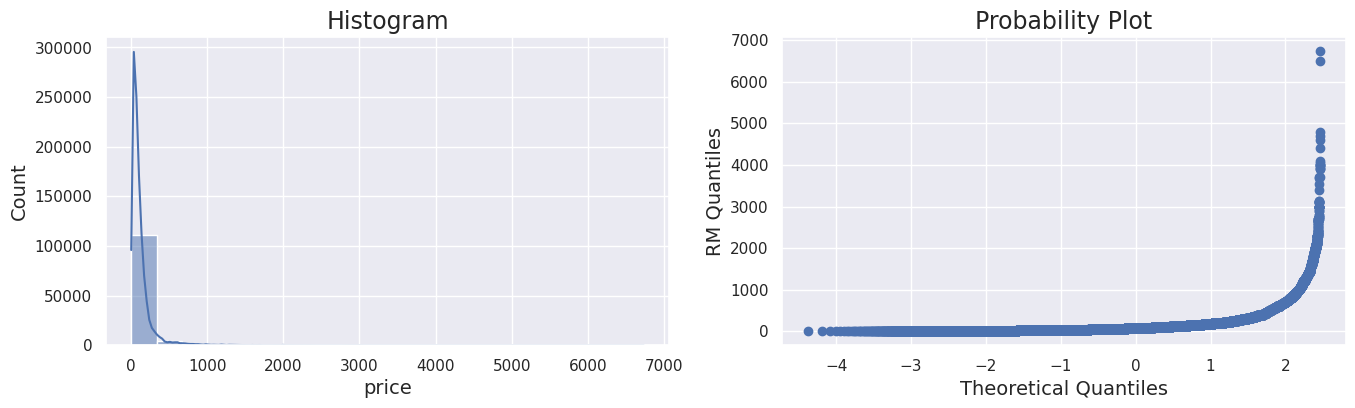

**2. Plot for freight_value**

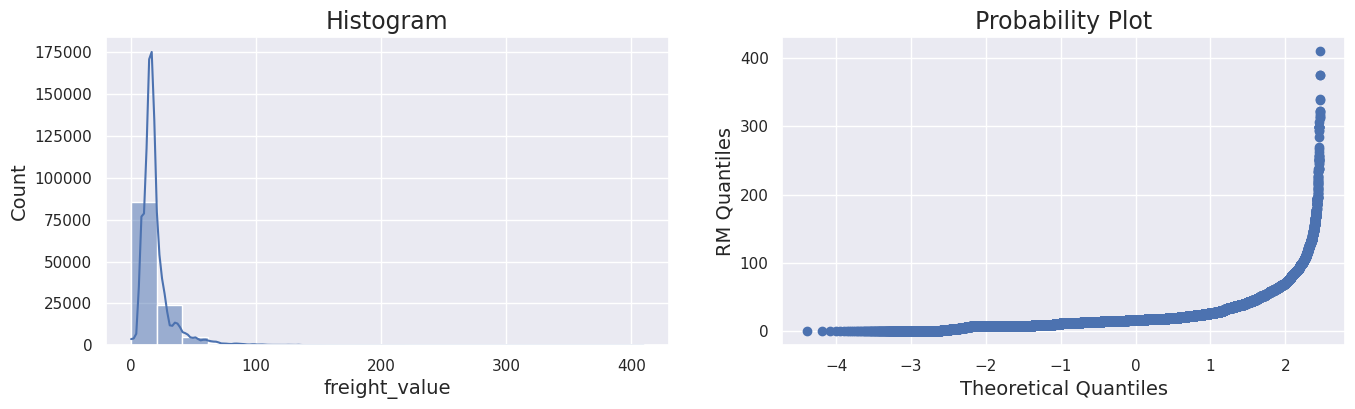

**3. Plot for order_item_id**

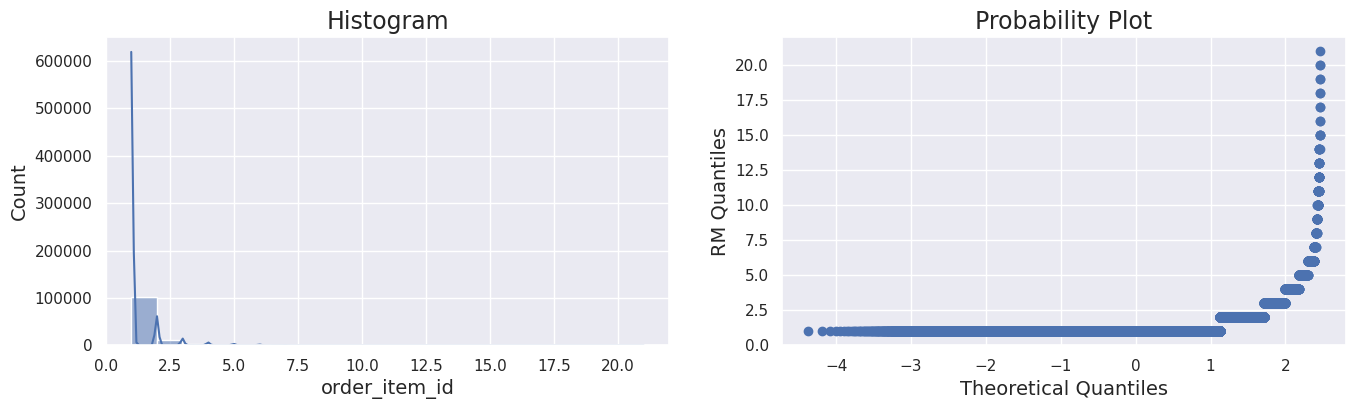

**4. Plot for product_weight_g**

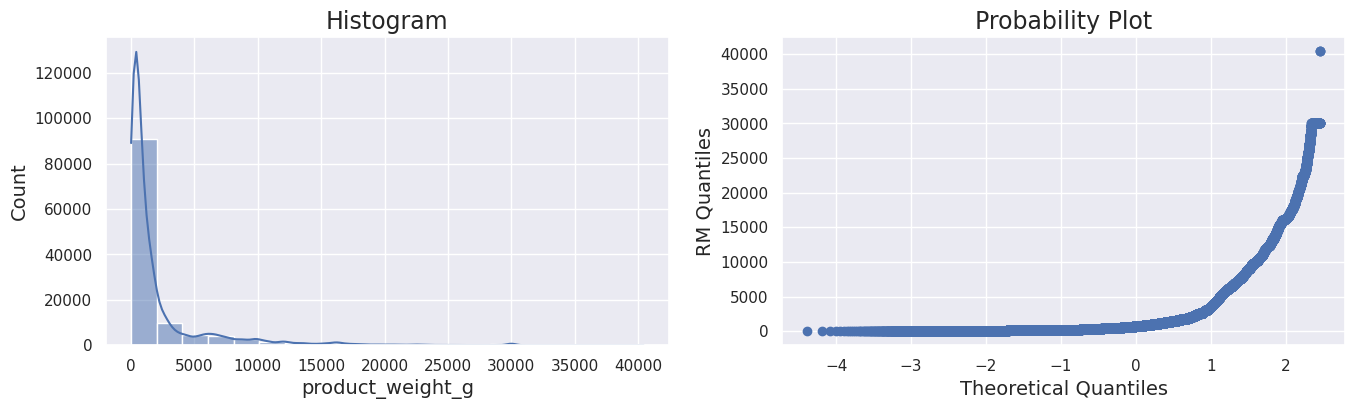

**5. Plot for product_length_cm**

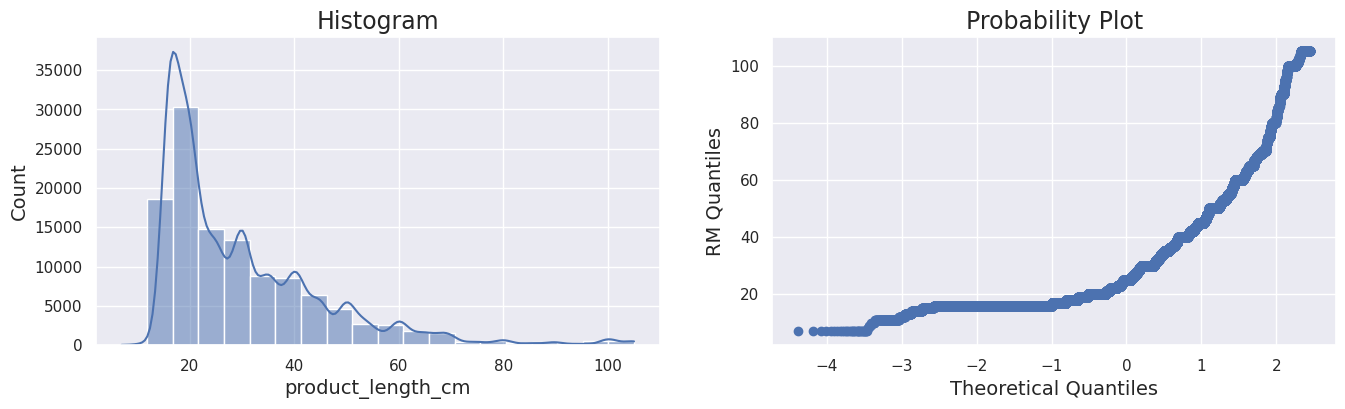

**6. Plot for product_height_cm**

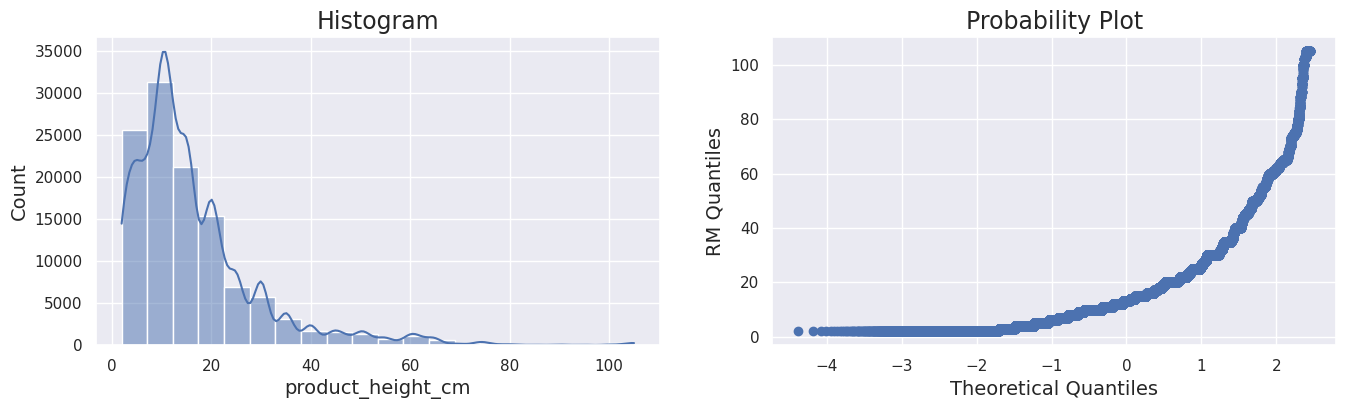

**7. Plot for product_width_cm**

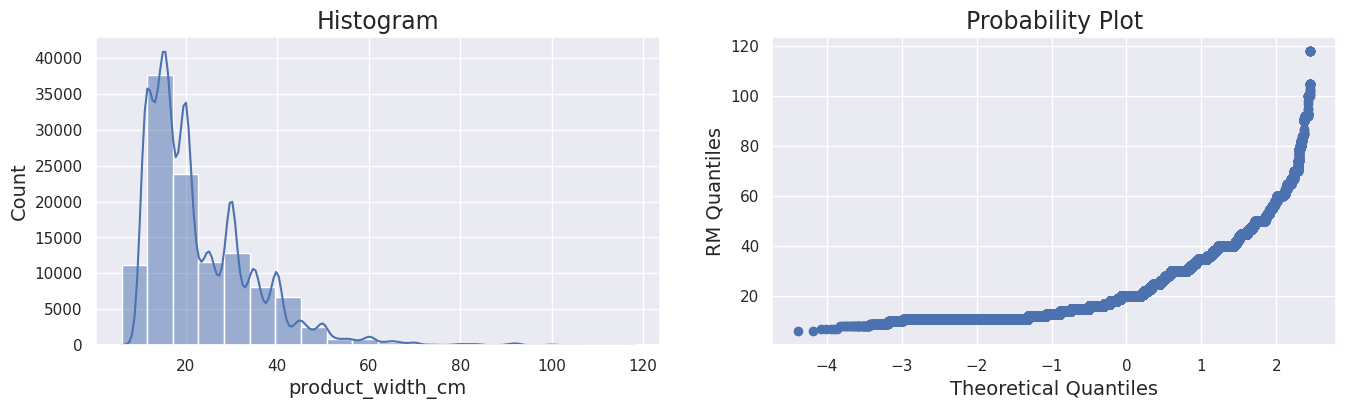

**8. Plot for product_name_lenght**

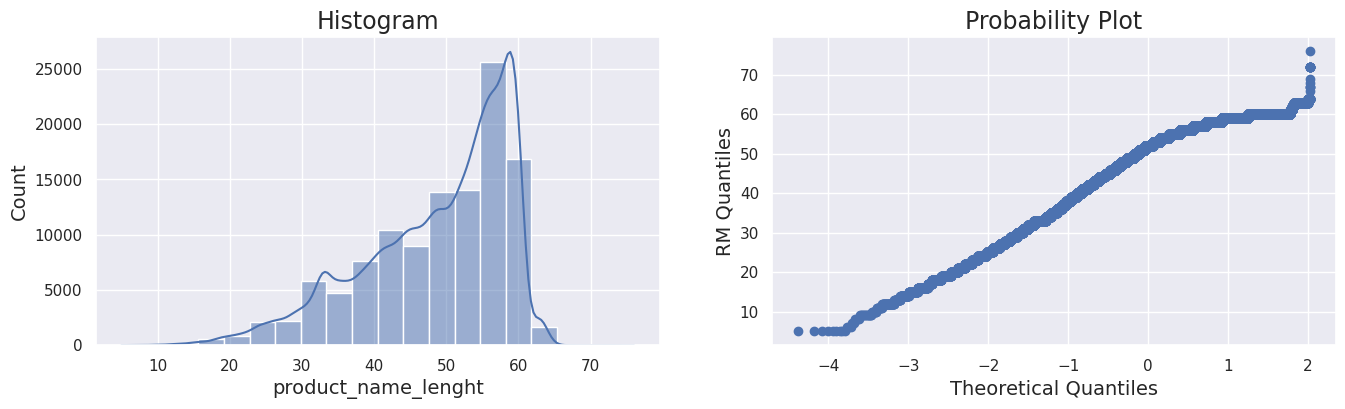

**9. Plot for product_description_lenght**

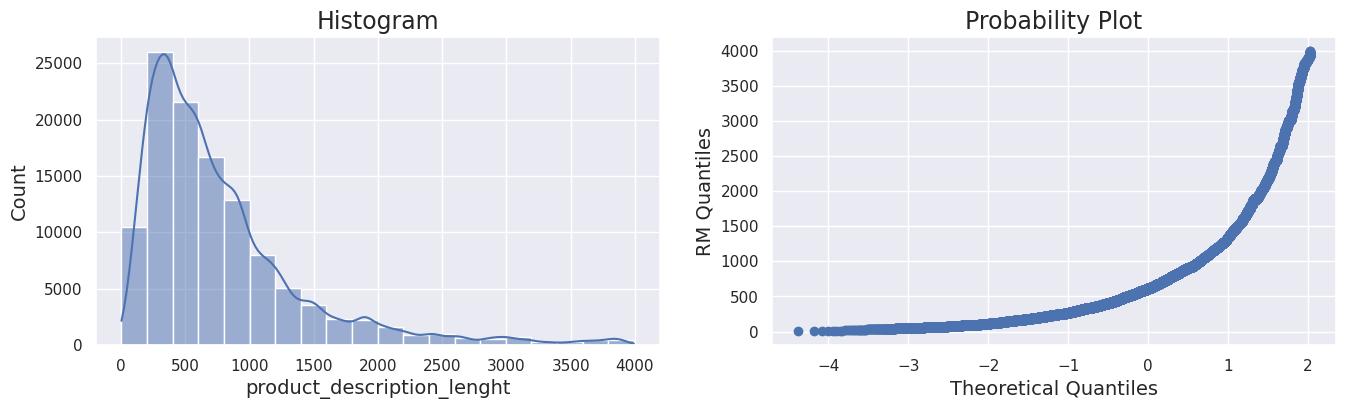

**10. Plot for product_photos_qty**

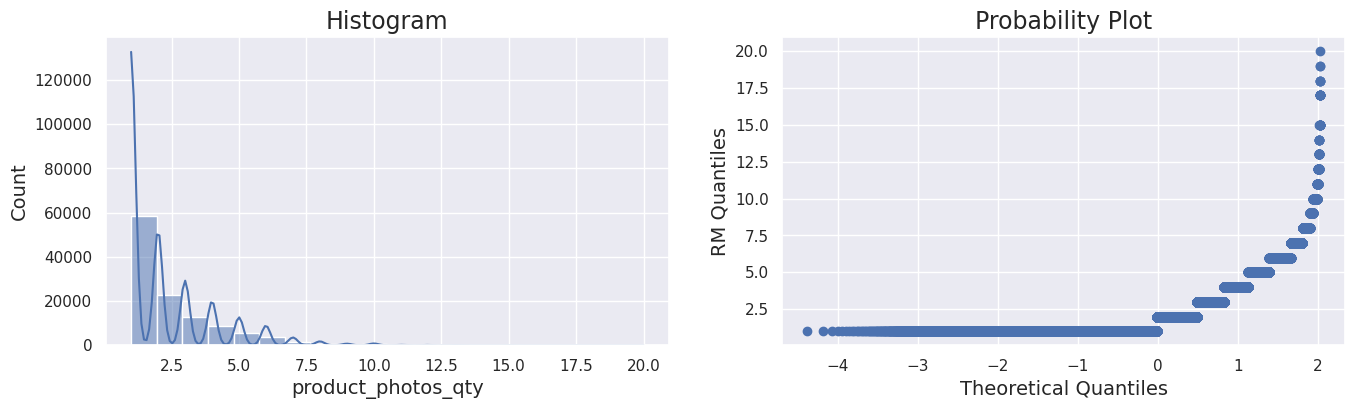

**11. Plot for payment_sequential**

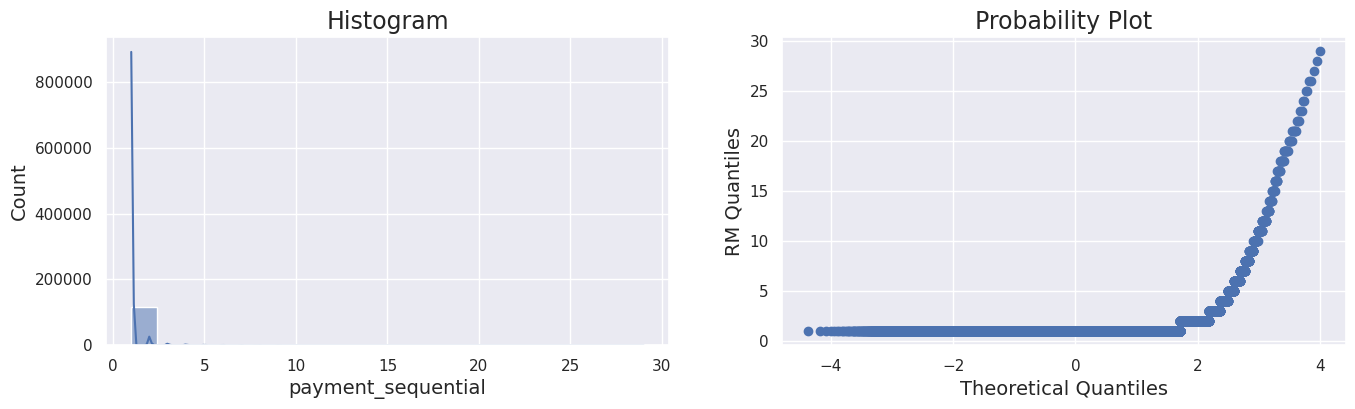

**12. Plot for payment_installments**

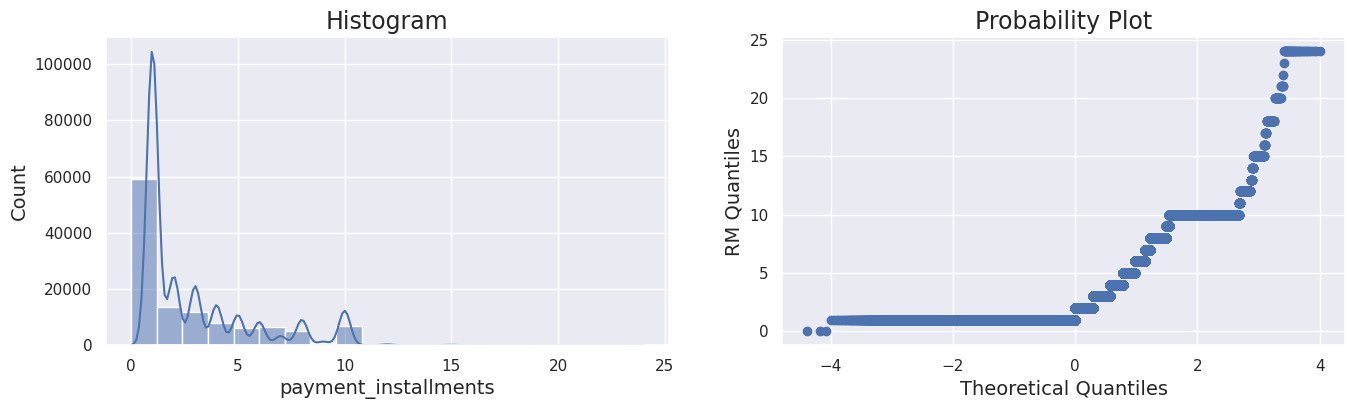

**13. Plot for payment_value**

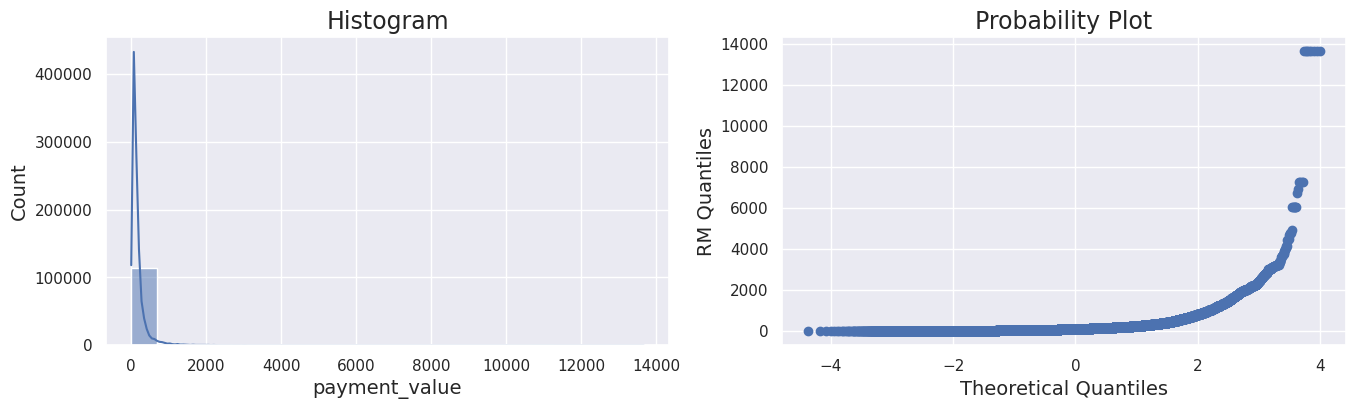

**14. Plot for review_score**

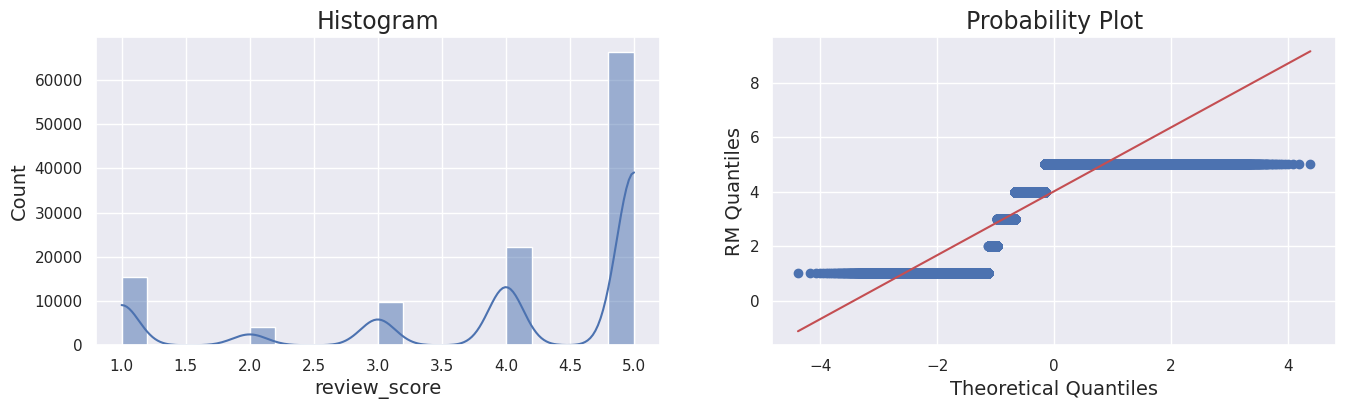

In [ ]:
eda.numerical_plots(orders, cont_columns, normality_check = True)

In [ ]:
fig = px.pie(orders['customer_state'], names = orders['customer_state'].value_counts().index,
             values = orders['customer_state'].value_counts().values,
             title = 'Customer State')
fig.show()

In [ ]:
fig = px.pie(orders['review_score'], names = orders['review_score'].value_counts().index,
             values = orders['review_score'].value_counts().values,
             title = 'Review Scores')
fig.show()

In [ ]:
items_reviews = pd.merge(order_reviews, order_items, how='left', on='order_id')
review_qty = items_reviews.groupby('review_score').size()
review_value = items_reviews.groupby('review_score')['price'].mean()

In [ ]:
trace0 = go.Bar(
    x=review_qty.index,
    y=review_qty.values,
    name='Number of orders',
    marker=dict(color='rgb(49,130,189)')
)
trace1 = go.Bar(
    x=review_value.index,
    y=review_value.values,
    name='Product mean value',
    marker=dict(color='rgb(204,204,204)')
)
fig = make_subplots(rows=1, cols=2, print_grid=False)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(height=400, width=800, title='Review Score')
fig['layout']['xaxis1'].update(title='review score', domain=[0, 0.40], tickmode = 'linear')
fig['layout']['xaxis2'].update(title='review score', domain=[0.6, 1], tickmode = 'linear')
iplot(fig);

<ipython-input-39-664a6fac9793>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



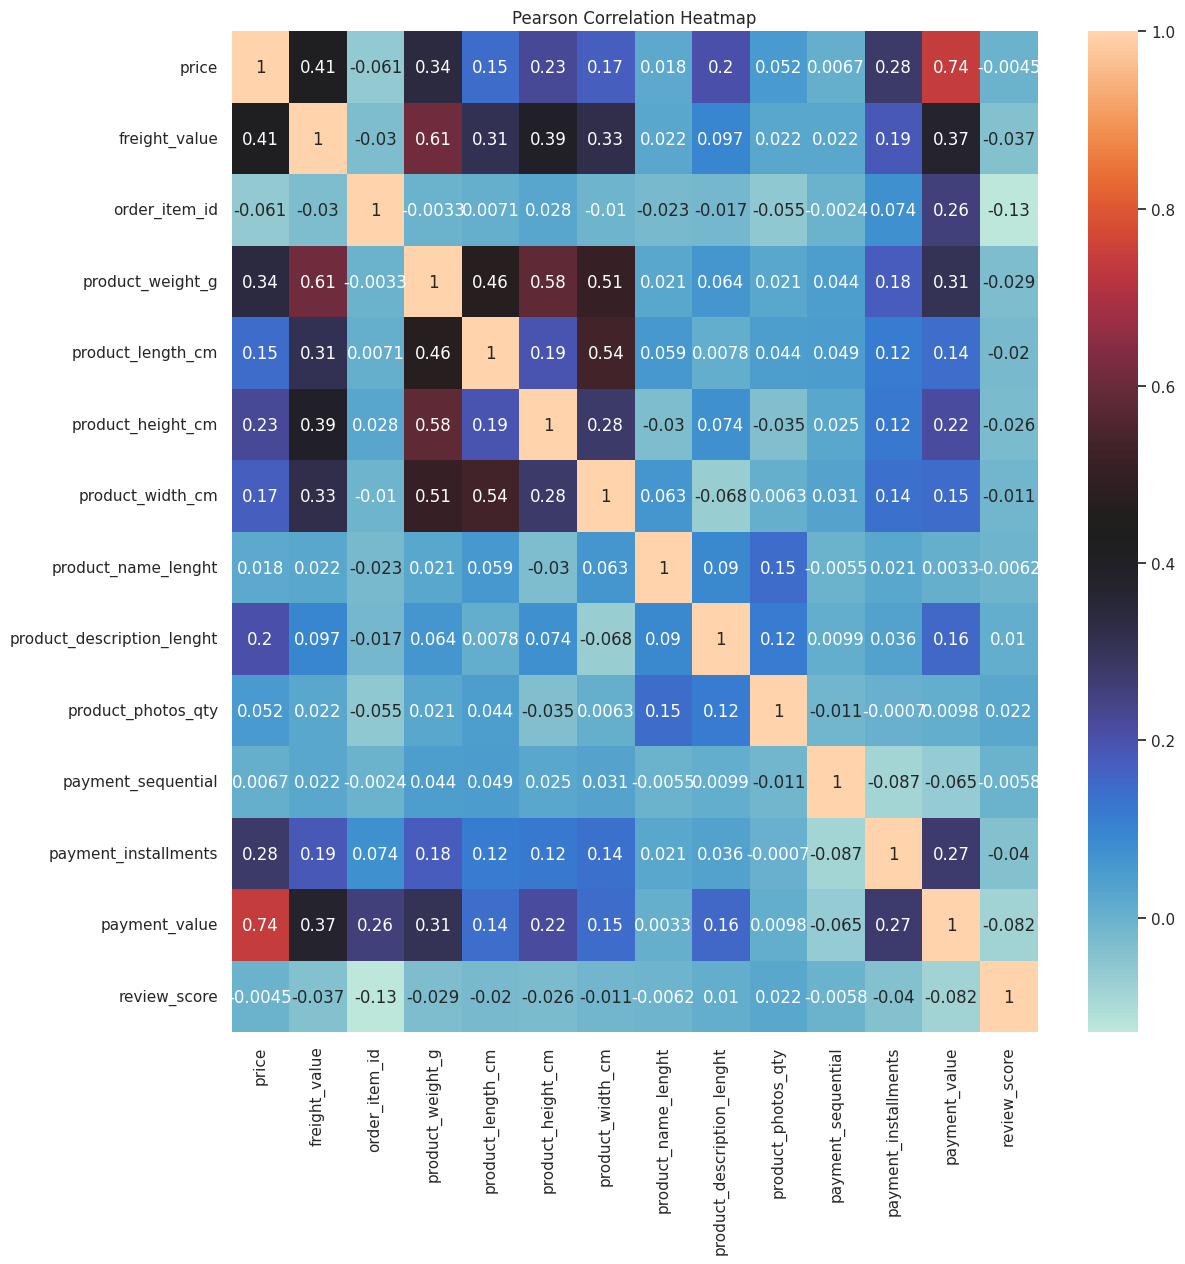

In [ ]:
fig, ax = plt.subplots(figsize = (13, 13))
plt.title("Pearson Correlation Heatmap")
sns.heatmap(orders.corr(method = 'pearson'), annot = True, cmap = 'icefire')
plt.show()

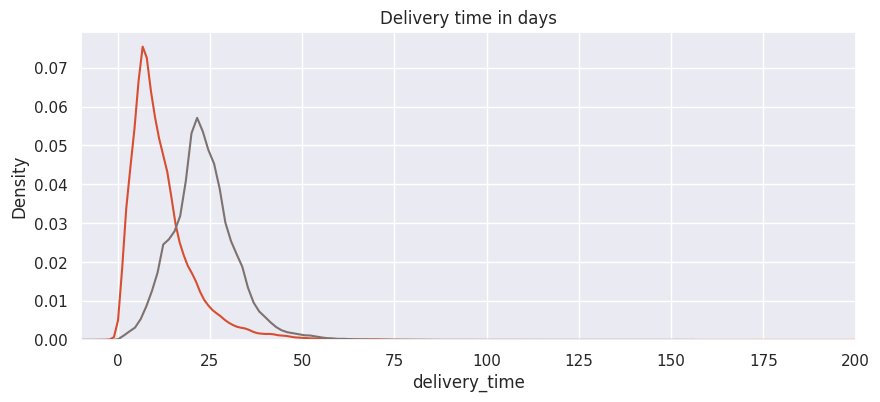

In [ ]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_approved_at']).dt.total_seconds() / 86400
orders_df['estimated_delivery_time'] = (orders_df['order_estimated_delivery_date'] - orders_df['order_approved_at']).dt.total_seconds() / 86400
plt.figure(figsize=(10,4))
plt.title("Delivery time in days")
plt.xlim(-10, 200)

ax1 = sns.kdeplot(orders_df['delivery_time'].dropna(), color="#D84E30", label='Delivery time')
ax2 = sns.kdeplot(orders_df['estimated_delivery_time'].dropna(), color="#7E7270", label='Estimated delivery time')

In [ ]:
top_ordersbyvalue_cities = orders.groupby("customer_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
top_ordersbyvalue_cities["% of Total Payments"] = (top_ordersbyvalue_cities["payment_value"] / top_ordersbyvalue_cities["payment_value"].sum()) * 100
top_ordersbyvalue_cities["Cum % of Total Payments"] = top_ordersbyvalue_cities["% of Total Payments"].cumsum()

In [ ]:
fig = px.bar(top_ordersbyvalue_cities[:10], x = "% of Total Payments", y = "customer_city",
             title = "Highest 10 cities by revenue generation")
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
fig = px.bar(top_ordersbyvalue_cities[-10:], x = "% of Total Payments", y = "customer_city",
             title = "Lowest 10 cities by revenue generation")
fig.show()

In [ ]:
plt.figure(figsize=(6,6))
reviewsocres = orders.groupby("product_category_name_english")["review_score"].agg(["mean", "count"]).sort_values(by="mean",ascending=False)
bestrated = reviewsocres[reviewsocres["count"]>=30][:10]
bestrated
fig = px.bar(bestrated, x = bestrated.values[0:, 0], y = bestrated.index,
             title = "Highest 10 rated items categories")
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

<Figure size 600x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(6,6))
worstrated = reviewsocres[reviewsocres["count"]>=30].sort_values(by='mean')[:10]
fig = px.bar(worstrated, x = worstrated.values[0:, 0], y = worstrated.index,
             title = "Lowest 10 rated items categories")
fig.show()

<Figure size 600x600 with 0 Axes>

In [ ]:
merged_groups = orders.groupby('customer_city')['payment_value'].sum().reset_index().sort_values('payment_value', ascending = False)
plt.figure(figsize = (12, 12))
fig = px.bar(merged_groups[:10], x = "customer_city", y='payment_value', title = 'Payment Value on the basis of State')
fig.show()

<Figure size 1200x1200 with 0 Axes>

In [ ]:
merged_groups = orders.groupby('product_category_name_english')['payment_value'].sum().reset_index().sort_values('payment_value', ascending = False)
plt.figure(figsize = (15, 15))
fig = px.bar(merged_groups[:10], x = "product_category_name_english", y='payment_value', title = 'Payment Value on the basis Product Value')
fig.show()

<Figure size 1500x1500 with 0 Axes>

In [ ]:
scorevstime = orders.groupby(pd.to_datetime(orders.order_purchase_timestamp).dt.year)["review_score"].mean().dropna()
plt.figure(figsize=(6,6))
fig = px.bar(scorevstime, x = scorevstime.index , y = scorevstime.values,
             title = "Mean Review Score on Yearly Basis")
fig.show()

<Figure size 600x600 with 0 Axes>

##4. Feature Engineering

In [ ]:
orders.head(10)

,customer_unique_id,order_status,price,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,freight_value,order_item_id,customer_city,...,product_name_lenght,product_description_lenght,product_photos_qty,payment_sequential,payment_type,payment_installments,payment_value,review_creation_date,review_answer_timestamp,review_score
0,68a5590b9926689be4e10f4ae2db21a8,delivered,185.00,2018-01-11,2018-01-11,2018-02-02,2018-01-17,13.63,1.0,osasco,...,42.0,858.0,1.0,1.0,credit_card,8.0,397.26,2018-01-18,2018-01-18,4
1,68a5590b9926689be4e10f4ae2db21a8,delivered,185.00,2018-01-11,2018-01-11,2018-02-02,2018-01-17,13.63,2.0,osasco,...,42.0,858.0,1.0,1.0,credit_card,8.0,397.26,2018-01-18,2018-01-18,4
2,64190b91b656ab8f37eb89b93dc84584,delivered,79.79,2018-02-28,2018-02-28,2018-03-14,2018-03-09,8.30,1.0,nova odessa,...,47.0,493.0,1.0,1.0,credit_card,1.0,88.09,2018-03-11,2018-03-11,5
3,1d47144362c14e94ccdd213e8ec277d5,delivered,149.00,2018-02-03,2018-02-03,2018-03-09,2018-02-16,45.12,1.0,santo antonio de jesus,...,59.0,1893.0,1.0,1.0,credit_card,1.0,194.12,2018-02-18,2018-02-18,5
4,c8cf6cb6b838dc7a33ed199b825e8616,delivered,179.99,2017-04-09,2017-04-09,2017-05-10,2017-04-20,42.85,1.0,gravatal,...,33.0,2188.0,2.0,1.0,credit_card,1.0,222.84,2017-04-21,2017-04-21,5
5,d16000272660a1fef81482ad75ba572a,delivered,1199.00,2018-02-10,2018-02-10,2018-03-09,2018-02-28,134.25,1.0,curitibanos,...,48.0,562.0,5.0,1.0,credit_card,10.0,1333.25,2018-03-02,2018-03-02,5
6,bda84be75dfc9588ae63cfe827080b9b,delivered,99.90,2018-04-06,2018-04-09,2018-05-03,2018-04-12,13.20,1.0,sao paulo,...,57.0,246.0,2.0,1.0,credit_card,1.0,462.70,2018-04-16,2018-04-16,1
7,bda84be75dfc9588ae63cfe827080b9b,delivered,99.90,2018-04-06,2018-04-09,2018-05-03,2018-04-12,13.20,2.0,sao paulo,...,57.0,246.0,2.0,1.0,credit_card,1.0,462.70,2018-04-16,2018-04-16,1
8,bda84be75dfc9588ae63cfe827080b9b,delivered,119.00,2018-04-06,2018-04-09,2018-05-03,2018-04-12,4.40,3.0,sao paulo,...,30.0,568.0,1.0,1.0,credit_card,1.0,462.70,2018-04-16,2018-04-16,1
9,bda84be75dfc9588ae63cfe827080b9b,delivered,99.90,2018-04-06,2018-04-09,2018-05-03,2018-04-12,13.20,4.0,sao paulo,...,57.0,246.0,2.0,1.0,credit_card,1.0,462.70,2018-04-16,2018-04-16,1


In [ ]:
orders.shape

(118146, 26)

In [ ]:
cat_columns

['customer_unique_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_estimated_delivery_date',
 'order_delivered_customer_date',
 'customer_city',
 'customer_state',
 'product_category_name_english',
 'payment_type',
 'review_creation_date',
 'review_answer_timestamp']

In [ ]:
cont_columns

['price',
 'freight_value',
 'order_item_id',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'review_score']

In [ ]:
skew_data = orders.skew(axis = 0, skipna = True)
skew_data

<ipython-input-53-f22a5d68bcc6>:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



price                          7.652406
freight_value                  5.552176
order_item_id                  7.181680
product_weight_g               3.582198
product_length_cm              1.745291
product_height_cm              2.239916
product_width_cm               1.705233
product_name_lenght           -0.905520
product_description_lenght     2.011468
product_photos_qty             1.910438
payment_sequential            15.732593
payment_installments           1.622332
payment_value                 14.127975
review_score                  -1.245767
dtype: float64

In [ ]:
orders['delivery_time'] = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']

In [ ]:
def delivery_time_days(x): #regarding delivery time
    if x >= 7 :
        return 'Slow'
    elif 4<=x<=6:
        return 'Medium'
    else:
        return 'Fast'

orders['delivery_time_class'] = orders['delivery_time'].dt.days.apply(lambda x: delivery_time_days(x))

In [ ]:
orders['delivery_time_class']

0         Medium
1         Medium
2           Slow
3           Slow
4           Slow
           ...  
118141      Slow
118142    Medium
118143      Fast
118144      Slow
118145      Fast
Name: delivery_time_class, Length: 118146, dtype: object

In [ ]:
fig = px.pie(orders['delivery_time_class'], names = orders['delivery_time_class'].value_counts().index,
             values = orders['delivery_time_class'].value_counts().values,
             title = 'Delivery Time')
fig.show()

In [ ]:
orders['review_upload_time'] = orders['review_answer_timestamp'] - orders['review_creation_date']

In [ ]:
def respone_by_seller(x): #regarding seller response time
    if x > 3 :
        return 'Slow'
    elif x == 0 :
        return 'On Time'
    else:
        return 'Fast'

orders['seller_response'] = orders['review_upload_time'].dt.days.apply(lambda x: respone_by_seller(x))

In [ ]:
orders['seller_response']

0         On Time
1         On Time
2         On Time
3         On Time
4         On Time
           ...   
118141    On Time
118142    On Time
118143    On Time
118144    On Time
118145    On Time
Name: seller_response, Length: 118146, dtype: object

In [ ]:
fig = px.pie(orders['seller_response'], names = orders['seller_response'].value_counts().index,
             values = orders['seller_response'].value_counts().values,
             title = 'Seller Response')
fig.show()

In [ ]:
def payment_vals(x): #regarding price of the product
    if x >= 700.00:
        return 'Expensive'
    elif 200.00<=x<=699.99:
        return 'Medium'
    else:
        return 'Cheap'

orders['payment_value_class'] = orders.payment_value.apply(lambda x: payment_vals(x))

In [ ]:
orders['payment_value_class']

0         Medium
1         Medium
2          Cheap
3          Cheap
4         Medium
           ...  
118141    Medium
118142    Medium
118143    Medium
118144     Cheap
118145     Cheap
Name: payment_value_class, Length: 118146, dtype: object

In [ ]:
fig = px.pie(orders['payment_value_class'], names = orders['payment_value_class'].value_counts().index,
             values = orders['payment_value_class'].value_counts().values,
             title = 'Payment Class')
fig.show()

In [ ]:
def customer_debentures(x): #regarding installments due
    if x == 1:
        return False
    else:
        return True

orders['customer_debt'] = orders.payment_installments.apply(lambda x: customer_debentures(x))

In [ ]:
orders['customer_debt']

0          True
1          True
2         False
3         False
4         False
          ...  
118141     True
118142    False
118143     True
118144    False
118145    False
Name: customer_debt, Length: 118146, dtype: bool

In [ ]:
fig = px.pie(orders['customer_debt'], names = orders['customer_debt'].value_counts().index,
             values = orders['customer_debt'].value_counts().values,
             title = 'Installments')
fig.show()

In [ ]:
def customer_cash_based_payment(x): #regarding customer payment method
    if x == ('boleto'):
        return True
    elif x == ('debit_card'):
        return True
    else:
        return False

orders['cash_customer_payment'] = orders.payment_type.apply(lambda x: customer_cash_based_payment(x))

In [ ]:
orders['cash_customer_payment']

0         False
1         False
2         False
3         False
4         False
          ...  
118141    False
118142    False
118143    False
118144    False
118145     True
Name: cash_customer_payment, Length: 118146, dtype: bool

In [ ]:
fig = px.pie(orders['cash_customer_payment'], names = orders['cash_customer_payment'].value_counts().index,
             values = orders['cash_customer_payment'].value_counts().values,
             title = 'Customer Payment')
fig.show()

In [ ]:
def product_weight(x): #regarding product weight
    if x > 3700:
        return 'Heavy'
    elif 1700<=x<=3700:
        return 'Medium'
    else:
        return 'Light'

orders['product_width_class'] = orders.product_weight_g.apply(lambda x: product_weight(x))

In [ ]:
orders['product_width_class']

0          Light
1          Light
2          Light
3          Heavy
4          Heavy
           ...  
118141     Heavy
118142    Medium
118143     Heavy
118144     Light
118145     Light
Name: product_width_class, Length: 118146, dtype: object

In [ ]:
fig = px.pie(orders['product_width_class'], names = orders['product_width_class'].value_counts().index,
             values = orders['product_width_class'].value_counts().values,
             title = 'Product Class')
fig.show()

In [ ]:
orders

,customer_unique_id,order_status,price,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,freight_value,order_item_id,customer_city,...,review_answer_timestamp,review_score,delivery_time,delivery_time_class,review_upload_time,seller_response,payment_value_class,customer_debt,cash_customer_payment,product_width_class
0,68a5590b9926689be4e10f4ae2db21a8,delivered,185.00,2018-01-11,2018-01-11,2018-02-02,2018-01-17,13.63,1.0,osasco,...,2018-01-18,4,6 days,Medium,0 days,On Time,Medium,True,False,Light
1,68a5590b9926689be4e10f4ae2db21a8,delivered,185.00,2018-01-11,2018-01-11,2018-02-02,2018-01-17,13.63,2.0,osasco,...,2018-01-18,4,6 days,Medium,0 days,On Time,Medium,True,False,Light
2,64190b91b656ab8f37eb89b93dc84584,delivered,79.79,2018-02-28,2018-02-28,2018-03-14,2018-03-09,8.30,1.0,nova odessa,...,2018-03-11,5,9 days,Slow,0 days,On Time,Cheap,False,False,Light
3,1d47144362c14e94ccdd213e8ec277d5,delivered,149.00,2018-02-03,2018-02-03,2018-03-09,2018-02-16,45.12,1.0,santo antonio de jesus,...,2018-02-18,5,13 days,Slow,0 days,On Time,Cheap,False,False,Heavy
4,c8cf6cb6b838dc7a33ed199b825e8616,delivered,179.99,2017-04-09,2017-04-09,2017-05-10,2017-04-20,42.85,1.0,gravatal,...,2017-04-21,5,11 days,Slow,0 days,On Time,Medium,False,False,Heavy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118141,50605c81f77a2171191dffee444613b2,delivered,226.77,2018-06-27,2018-06-28,2018-07-20,2018-07-06,61.20,1.0,goiania,...,2018-07-14,5,9 days,Slow,0 days,On Time,Medium,True,False,Heavy
118142,597cbb334f18a671472f7e16648228b4,delivered,199.99,2017-12-03,2017-12-03,2017-12-20,2017-12-08,9.77,1.0,rio de janeiro,...,2017-12-11,5,5 days,Medium,0 days,On Time,Medium,False,False,Medium
118143,c860357db400d72a2497064f8376fba9,delivered,215.97,2018-03-18,2018-03-18,2018-04-06,2018-03-21,15.59,1.0,lavras,...,2018-03-23,5,3 days,Fast,0 days,On Time,Medium,True,False,Heavy
118144,96ac4cb74918d3ace141d3d3ddc1ff02,delivered,50.95,2018-06-22,2018-06-22,2018-07-16,2018-06-30,15.46,1.0,betim,...,2018-07-02,4,8 days,Slow,0 days,On Time,Cheap,False,False,Light


In [ ]:
orders = orders.rename(columns = {'order_purchase_timestamp' : 'last_transaction'})

In [ ]:
cust_state = orders.groupby('customer_state', sort = False)['review_score'].value_counts()
cust_state

customer_state  review_score
SP              5               29311
                4                9417
                1                5535
                3                4034
                2                1625
                                ...  
AP              5                  44
                4                  25
                3                   8
                1                   4
                2                   2
Name: review_score, Length: 135, dtype: int64

In [ ]:
cust_state.index.values

array([('SP', 5), ('SP', 4), ('SP', 1), ('SP', 3), ('SP', 2), ('BA', 5),
       ('BA', 4), ('BA', 1), ('BA', 3), ('BA', 2), ('SC', 5), ('SC', 4),
       ('SC', 1), ('SC', 3), ('SC', 2), ('RJ', 5), ('RJ', 1), ('RJ', 4),
       ('RJ', 3), ('RJ', 2), ('MG', 5), ('MG', 4), ('MG', 1), ('MG', 3),
       ('MG', 2), ('ES', 5), ('ES', 4), ('ES', 1), ('ES', 3), ('ES', 2),
       ('DF', 5), ('DF', 4), ('DF', 1), ('DF', 3), ('DF', 2), ('RS', 5),
       ('RS', 4), ('RS', 1), ('RS', 3), ('RS', 2), ('PE', 5), ('PE', 4),
       ('PE', 1), ('PE', 3), ('PE', 2), ('PI', 5), ('PI', 4), ('PI', 1),
       ('PI', 3), ('PI', 2), ('GO', 5), ('GO', 4), ('GO', 1), ('GO', 3),
       ('GO', 2), ('PR', 5), ('PR', 4), ('PR', 1), ('PR', 3), ('PR', 2),
       ('MT', 5), ('MT', 4), ('MT', 1), ('MT', 3), ('MT', 2), ('PA', 5),
       ('PA', 4), ('PA', 1), ('PA', 3), ('PA', 2), ('AC', 5), ('AC', 4),
       ('AC', 3), ('AC', 2), ('AC', 1), ('MA', 5), ('MA', 1), ('MA', 4),
       ('MA', 3), ('MA', 2), ('RO', 5), ('RO', 4), 

In [ ]:
state = []
for t in cust_state.index.values:
     state.append(t[0])

all_state = list(unique_everseen(state))
all_state

['SP',
 'BA',
 'SC',
 'RJ',
 'MG',
 'ES',
 'DF',
 'RS',
 'PE',
 'PI',
 'GO',
 'PR',
 'MT',
 'PA',
 'AC',
 'MA',
 'RO',
 'SE',
 'AM',
 'PB',
 'RN',
 'TO',
 'CE',
 'AL',
 'MS',
 'RR',
 'AP']

In [ ]:
cust_st = all_state
rate = (5, 4, 1, 3, 2)
index = pd.MultiIndex.from_product(
    [cust_st, rate],
   names=['Customer State', 'Ratings']
)

#values = [36927, 12995, 2836, 1200, 3057, 1252, 10736, 4566, 9847, 3867]
values = cust_state.values
data = pd.DataFrame(data={'val': values}, index=index).reset_index()
data

,Customer State,Ratings,val
0,SP,5,29311
1,SP,4,9417
2,SP,1,5535
3,SP,3,4034
4,SP,2,1625
...,...,...,...
130,AP,5,44
131,AP,4,25
132,AP,1,8
133,AP,3,4


In [ ]:
plt.figure(figsize=(10,10))
fig = px.bar(data, x = "Customer State", y = "val", color = "Ratings", title = "State wise Review Scores")
fig.show()

<Figure size 1000x1000 with 0 Axes>

In [ ]:
orders

,customer_unique_id,order_status,price,last_transaction,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,freight_value,order_item_id,customer_city,...,review_answer_timestamp,review_score,delivery_time,delivery_time_class,review_upload_time,seller_response,payment_value_class,customer_debt,cash_customer_payment,product_width_class
0,68a5590b9926689be4e10f4ae2db21a8,delivered,185.00,2018-01-11,2018-01-11,2018-02-02,2018-01-17,13.63,1.0,osasco,...,2018-01-18,4,6 days,Medium,0 days,On Time,Medium,True,False,Light
1,68a5590b9926689be4e10f4ae2db21a8,delivered,185.00,2018-01-11,2018-01-11,2018-02-02,2018-01-17,13.63,2.0,osasco,...,2018-01-18,4,6 days,Medium,0 days,On Time,Medium,True,False,Light
2,64190b91b656ab8f37eb89b93dc84584,delivered,79.79,2018-02-28,2018-02-28,2018-03-14,2018-03-09,8.30,1.0,nova odessa,...,2018-03-11,5,9 days,Slow,0 days,On Time,Cheap,False,False,Light
3,1d47144362c14e94ccdd213e8ec277d5,delivered,149.00,2018-02-03,2018-02-03,2018-03-09,2018-02-16,45.12,1.0,santo antonio de jesus,...,2018-02-18,5,13 days,Slow,0 days,On Time,Cheap,False,False,Heavy
4,c8cf6cb6b838dc7a33ed199b825e8616,delivered,179.99,2017-04-09,2017-04-09,2017-05-10,2017-04-20,42.85,1.0,gravatal,...,2017-04-21,5,11 days,Slow,0 days,On Time,Medium,False,False,Heavy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118141,50605c81f77a2171191dffee444613b2,delivered,226.77,2018-06-27,2018-06-28,2018-07-20,2018-07-06,61.20,1.0,goiania,...,2018-07-14,5,9 days,Slow,0 days,On Time,Medium,True,False,Heavy
118142,597cbb334f18a671472f7e16648228b4,delivered,199.99,2017-12-03,2017-12-03,2017-12-20,2017-12-08,9.77,1.0,rio de janeiro,...,2017-12-11,5,5 days,Medium,0 days,On Time,Medium,False,False,Medium
118143,c860357db400d72a2497064f8376fba9,delivered,215.97,2018-03-18,2018-03-18,2018-04-06,2018-03-21,15.59,1.0,lavras,...,2018-03-23,5,3 days,Fast,0 days,On Time,Medium,True,False,Heavy
118144,96ac4cb74918d3ace141d3d3ddc1ff02,delivered,50.95,2018-06-22,2018-06-22,2018-07-16,2018-06-30,15.46,1.0,betim,...,2018-07-02,4,8 days,Slow,0 days,On Time,Cheap,False,False,Light


In [ ]:
orders.columns

Index(['customer_unique_id', 'order_status', 'price', 'last_transaction',
       'order_approved_at', 'order_estimated_delivery_date',
       'order_delivered_customer_date', 'freight_value', 'order_item_id',
       'customer_city', 'customer_state', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_creation_date', 'review_answer_timestamp',
       'review_score', 'delivery_time', 'delivery_time_class',
       'review_upload_time', 'seller_response', 'payment_value_class',
       'customer_debt', 'cash_customer_payment', 'product_width_class'],
      dtype='object')

In [ ]:
orders.drop(columns=['price', 'customer_city','customer_state','last_transaction',
       'order_approved_at', 'order_estimated_delivery_date',
       'order_delivered_customer_date', 'freight_value', 'product_weight_g',
      'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'product_name_lenght',
       'product_description_lenght',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_creation_date', 'review_answer_timestamp', 'review_upload_time', 'delivery_time'], inplace = True)

In [ ]:
#sum(orders.duplicated())

In [ ]:
#orders = orders.drop_duplicates()

In [ ]:
#log_transform = np.log(orders[cont_columns] + 1)
#log_transform

In [ ]:
#orders = orders.drop(columns = cont_columns, axis = 1)

In [ ]:
#orders.head(10)

In [ ]:
#orders = pd.concat([orders, log_transform], axis = 1)

In [ ]:
#orders.head(10)

In [ ]:
#orders.shape

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118146 entries, 0 to 118145
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_unique_id     118146 non-null  object 
 1   order_status           118146 non-null  object 
 2   order_item_id          117332 non-null  float64
 3   product_photos_qty     115637 non-null  float64
 4   review_score           118146 non-null  int64  
 5   delivery_time_class    118146 non-null  object 
 6   seller_response        118146 non-null  object 
 7   payment_value_class    118146 non-null  object 
 8   customer_debt          118146 non-null  bool   
 9   cash_customer_payment  118146 non-null  bool   
 10  product_width_class    118146 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 9.2+ MB


In [ ]:
for c in orders.select_dtypes(include = ([np.number])).columns.values:
  orders[c].fillna(orders[c].median(), inplace=True)

for c in orders.select_dtypes(include = (['object'])).columns.values:
  orders[c].fillna(orders[c].mode().values[0], inplace=True)

In [ ]:
eda.numerical_check_outliers(orders, list(orders.select_dtypes(include=[np.number]).columns.values), tol=1.5, print_vars = False)

,lower_bound_outliers,upper_bound_outliers,total_outliers,perc_outliers
review_score,19590,0,19590,16.581179
order_item_id,0,14468,14468,12.245865
product_photos_qty,0,3184,3184,2.694971


In [ ]:
outliers = eda.numerical_check_outliers(orders, list(orders.select_dtypes(include=[np.number]).columns.values), tol=1.5, print_vars = False)
per = outliers['perc_outliers']
tot = outliers['total_outliers']

In [ ]:
fig = px.bar(data, x = per.index, y = per.values, title = "Outliers on Basis of Percentage")
fig.show()

In [ ]:
fig = px.bar(data, x = tot.index, y = tot.values, title = "Outliers on Basis of Count")
fig.show()

In [ ]:
elpenv = EllipticEnvelope(contamination=0.025, random_state=1)
  # Returns 1 of inliers, -1 for outliers
pred = elpenv.fit_predict(orders[list(orders.select_dtypes(include=[np.number]).columns.values)])

anom_index = np.where(pred==-1)
rem = orders.loc[anom_index]

rem

,customer_unique_id,order_status,order_item_id,product_photos_qty,review_score,delivery_time_class,seller_response,payment_value_class,customer_debt,cash_customer_payment,product_width_class
8,bda84be75dfc9588ae63cfe827080b9b,delivered,3.0,1.0,1,Medium,On Time,Medium,False,False,Light
9,bda84be75dfc9588ae63cfe827080b9b,delivered,4.0,2.0,1,Medium,On Time,Medium,False,False,Light
18,92dcd4992a1c796d78efe76628436880,delivered,4.0,1.0,5,Slow,On Time,Medium,False,True,Light
19,92dcd4992a1c796d78efe76628436880,delivered,5.0,1.0,5,Slow,On Time,Medium,False,True,Light
57,3b81cc8417be691f3159596da7e08a3c,delivered,3.0,1.0,1,Slow,On Time,Medium,True,False,Light
...,...,...,...,...,...,...,...,...,...,...,...
117934,58703c8104494f333026acd373ca9027,delivered,3.0,1.0,1,Slow,On Time,Cheap,True,False,Light
118048,75d0154ed5d24c347fd4c5bccc050e1c,delivered,3.0,2.0,1,Slow,On Time,Medium,True,False,Medium
118114,c9ae1d598a33315fdace01e3bfefc5ea,delivered,4.0,2.0,3,Slow,On Time,Medium,False,False,Light
118115,c9ae1d598a33315fdace01e3bfefc5ea,delivered,5.0,2.0,3,Slow,On Time,Medium,False,False,Light


In [ ]:
orders.drop(index = rem.index, axis = 0, inplace = True)

In [ ]:
orders.shape

(115155, 11)

In [ ]:
orders

,customer_unique_id,order_status,order_item_id,product_photos_qty,review_score,delivery_time_class,seller_response,payment_value_class,customer_debt,cash_customer_payment,product_width_class
0,68a5590b9926689be4e10f4ae2db21a8,delivered,1.0,1.0,4,Medium,On Time,Medium,True,False,Light
1,68a5590b9926689be4e10f4ae2db21a8,delivered,2.0,1.0,4,Medium,On Time,Medium,True,False,Light
2,64190b91b656ab8f37eb89b93dc84584,delivered,1.0,1.0,5,Slow,On Time,Cheap,False,False,Light
3,1d47144362c14e94ccdd213e8ec277d5,delivered,1.0,1.0,5,Slow,On Time,Cheap,False,False,Heavy
4,c8cf6cb6b838dc7a33ed199b825e8616,delivered,1.0,2.0,5,Slow,On Time,Medium,False,False,Heavy
...,...,...,...,...,...,...,...,...,...,...,...
118141,50605c81f77a2171191dffee444613b2,delivered,1.0,1.0,5,Slow,On Time,Medium,True,False,Heavy
118142,597cbb334f18a671472f7e16648228b4,delivered,1.0,1.0,5,Medium,On Time,Medium,False,False,Medium
118143,c860357db400d72a2497064f8376fba9,delivered,1.0,3.0,5,Fast,On Time,Medium,True,False,Heavy
118144,96ac4cb74918d3ace141d3d3ddc1ff02,delivered,1.0,5.0,4,Slow,On Time,Cheap,False,False,Light


In [ ]:
X = orders.drop('review_score', axis = 1)
y = orders['review_score']

In [ ]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
X.shape, y.shape

((115155, 10), (115155,))

In [ ]:
X.head(10)

,customer_unique_id,order_status,order_item_id,product_photos_qty,delivery_time_class,seller_response,payment_value_class,customer_debt,cash_customer_payment,product_width_class
0,68a5590b9926689be4e10f4ae2db21a8,delivered,1.0,1.0,Medium,On Time,Medium,True,False,Light
1,68a5590b9926689be4e10f4ae2db21a8,delivered,2.0,1.0,Medium,On Time,Medium,True,False,Light
2,64190b91b656ab8f37eb89b93dc84584,delivered,1.0,1.0,Slow,On Time,Cheap,False,False,Light
3,1d47144362c14e94ccdd213e8ec277d5,delivered,1.0,1.0,Slow,On Time,Cheap,False,False,Heavy
4,c8cf6cb6b838dc7a33ed199b825e8616,delivered,1.0,2.0,Slow,On Time,Medium,False,False,Heavy
5,d16000272660a1fef81482ad75ba572a,delivered,1.0,5.0,Slow,On Time,Expensive,True,False,Heavy
6,bda84be75dfc9588ae63cfe827080b9b,delivered,1.0,2.0,Medium,On Time,Medium,False,False,Light
7,bda84be75dfc9588ae63cfe827080b9b,delivered,2.0,2.0,Medium,On Time,Medium,False,False,Light
10,dcd4940b3f96a3e2b73d8f73387230cf,delivered,1.0,1.0,Slow,On Time,Cheap,True,False,Light
11,c7b4fb0959a97e7033ff9bef3b1e2ba9,delivered,1.0,9.0,Medium,On Time,Cheap,True,False,Heavy


In [ ]:
y.head(10)

0     4
1     4
2     5
3     5
4     5
5     5
6     1
7     1
10    5
11    5
Name: review_score, dtype: int64

In [ ]:
X.dtypes

customer_unique_id        object
order_status              object
order_item_id            float64
product_photos_qty       float64
delivery_time_class       object
seller_response           object
payment_value_class       object
customer_debt               bool
cash_customer_payment       bool
product_width_class       object
dtype: object

In [ ]:
X_num_col = X.select_dtypes(include = ([np.number])).columns.values
X_num_cat = X.select_dtypes(include = (['object'])).columns.values

In [ ]:
full_pipe = ColumnTransformer(transformers = [('ord_enc', OrdinalEncoder(), X_num_cat), ('std_scl', StandardScaler(), X_num_col)],
                                remainder = 'passthrough')

X_pipe = full_pipe.fit_transform(X)

X_pipe

array([[ 3.89900000e+04,  3.00000000e+00,  1.00000000e+00, ...,
        -7.09935911e-01,  1.00000000e+00,  0.00000000e+00],
       [ 3.89900000e+04,  3.00000000e+00,  1.00000000e+00, ...,
        -7.09935911e-01,  1.00000000e+00,  0.00000000e+00],
       [ 3.72960000e+04,  3.00000000e+00,  2.00000000e+00, ...,
        -7.09935911e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 7.45090000e+04,  3.00000000e+00,  0.00000000e+00, ...,
         5.19825137e-01,  1.00000000e+00,  0.00000000e+00],
       [ 5.59710000e+04,  3.00000000e+00,  2.00000000e+00, ...,
         1.74958619e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.49960000e+04,  3.00000000e+00,  0.00000000e+00, ...,
        -9.50553870e-02,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
full_pipe

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord_enc', OrdinalEncoder(),
                                 array(['customer_unique_id', 'order_status', 'delivery_time_class',
       'seller_response', 'payment_value_class', 'product_width_class'],
      dtype=object)),
                                ('std_scl', StandardScaler(),
                                 array(['order_item_id', 'product_photos_qty'], dtype=object))])

In [ ]:
X_feat = X_pipe

In [ ]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_feat, i) for i in range(X_feat.shape[1])]
vif["Features"] = X.columns
vif

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning:

invalid value encountered in double_scalars



,vif,Features
0,3.846315,customer_unique_id
1,10.678920,order_status
2,5.869747,order_item_id
3,NaN,product_photos_qty
4,1.394399,delivery_time_class
5,4.380524,seller_response
6,1.036729,payment_value_class
7,1.004257,customer_debt
8,2.807502,cash_customer_payment
9,1.726743,product_width_class


In [ ]:
vif_filtered = vif[vif['vif']<10]
vif_filtered

,vif,Features
0,3.846315,customer_unique_id
2,5.869747,order_item_id
4,1.394399,delivery_time_class
5,4.380524,seller_response
6,1.036729,payment_value_class
7,1.004257,customer_debt
8,2.807502,cash_customer_payment
9,1.726743,product_width_class


In [ ]:
cols = list(vif_filtered['Features'].unique())
X_filtered = X[cols]
X_filtered

,customer_unique_id,order_item_id,delivery_time_class,seller_response,payment_value_class,customer_debt,cash_customer_payment,product_width_class
0,68a5590b9926689be4e10f4ae2db21a8,1.0,Medium,On Time,Medium,True,False,Light
1,68a5590b9926689be4e10f4ae2db21a8,2.0,Medium,On Time,Medium,True,False,Light
2,64190b91b656ab8f37eb89b93dc84584,1.0,Slow,On Time,Cheap,False,False,Light
3,1d47144362c14e94ccdd213e8ec277d5,1.0,Slow,On Time,Cheap,False,False,Heavy
4,c8cf6cb6b838dc7a33ed199b825e8616,1.0,Slow,On Time,Medium,False,False,Heavy
...,...,...,...,...,...,...,...,...
118141,50605c81f77a2171191dffee444613b2,1.0,Slow,On Time,Medium,True,False,Heavy
118142,597cbb334f18a671472f7e16648228b4,1.0,Medium,On Time,Medium,False,False,Medium
118143,c860357db400d72a2497064f8376fba9,1.0,Fast,On Time,Medium,True,False,Heavy
118144,96ac4cb74918d3ace141d3d3ddc1ff02,1.0,Slow,On Time,Cheap,False,False,Light


In [ ]:
X_cont = list(X_filtered.select_dtypes(include=[np.number]).columns.values)
X_cat = list(X_filtered.select_dtypes(include=['object']).columns.values)

In [ ]:
X_cols = X_filtered.select_dtypes(include = ([np.number])).columns.values
X_cats = X_filtered.select_dtypes(include = (['object'])).columns.values

In [ ]:
new_pipe = ColumnTransformer(transformers = [('ord_enc', OrdinalEncoder(), X_cats), ('std_scl', StandardScaler(), X_cols )],
                                remainder = 'passthrough')

X_pipe = new_pipe.fit_transform(X_filtered)

X_pipe

array([[ 3.89900000e+04,  1.00000000e+00,  0.00000000e+00, ...,
        -3.22050294e-01,  1.00000000e+00,  0.00000000e+00],
       [ 3.89900000e+04,  1.00000000e+00,  0.00000000e+00, ...,
         2.42259902e+00,  1.00000000e+00,  0.00000000e+00],
       [ 3.72960000e+04,  2.00000000e+00,  0.00000000e+00, ...,
        -3.22050294e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 7.45090000e+04,  0.00000000e+00,  0.00000000e+00, ...,
        -3.22050294e-01,  1.00000000e+00,  0.00000000e+00],
       [ 5.59710000e+04,  2.00000000e+00,  0.00000000e+00, ...,
        -3.22050294e-01,  0.00000000e+00,  0.00000000e+00],
       [ 2.49960000e+04,  0.00000000e+00,  0.00000000e+00, ...,
        -3.22050294e-01,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
new_pipe

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord_enc', OrdinalEncoder(),
                                 array(['customer_unique_id', 'delivery_time_class', 'seller_response',
       'payment_value_class', 'product_width_class'], dtype=object)),
                                ('std_scl', StandardScaler(),
                                 array(['order_item_id'], dtype=object))])

In [ ]:
X_featured = X_pipe
X_featured

array([[ 3.89900000e+04,  1.00000000e+00,  0.00000000e+00, ...,
        -3.22050294e-01,  1.00000000e+00,  0.00000000e+00],
       [ 3.89900000e+04,  1.00000000e+00,  0.00000000e+00, ...,
         2.42259902e+00,  1.00000000e+00,  0.00000000e+00],
       [ 3.72960000e+04,  2.00000000e+00,  0.00000000e+00, ...,
        -3.22050294e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 7.45090000e+04,  0.00000000e+00,  0.00000000e+00, ...,
        -3.22050294e-01,  1.00000000e+00,  0.00000000e+00],
       [ 5.59710000e+04,  2.00000000e+00,  0.00000000e+00, ...,
        -3.22050294e-01,  0.00000000e+00,  0.00000000e+00],
       [ 2.49960000e+04,  0.00000000e+00,  0.00000000e+00, ...,
        -3.22050294e-01,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
X_featured.shape, y.shape

((115155, 8), (115155,))

In [ ]:
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_featured, y)

In [ ]:
fig = px.pie(y, names = y.value_counts().index,
             values = y.value_counts().values,
             title = 'Before SMOTE Process')
fig.show()

In [ ]:
fig = px.pie(y_sm, names = y_sm.value_counts().index,
             values = y_sm.value_counts().values,
             title = 'After SMOTE Process')
fig.show()

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)
for train_index, test_index in split.split(X_sm, y_sm):
  X_train, X_test = X_sm[train_index], X_sm[test_index]
  y_train, y_test = y_sm[train_index], y_sm[test_index]

In [ ]:
X_train.shape, y_train.shape

((219274, 8), (219274,))

In [ ]:
X_test.shape, y_test.shape

((108001, 8), (108001,))

##5. Data Modelling



In [ ]:
model_knn = KNeighborsClassifier(n_jobs = -1)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
train_acc_knn = model_knn.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc_knn*100))

The Accuracy for Training Set is 66.86155221321269


In [ ]:
y_pred_knn = model_knn.predict(X_test)
test_acc_knn = accuracy_score(y_test, y_pred_knn)
print("The Accuracy for Test Set is {}".format(test_acc_knn*100))

The Accuracy for Test Set is 51.379153896723174


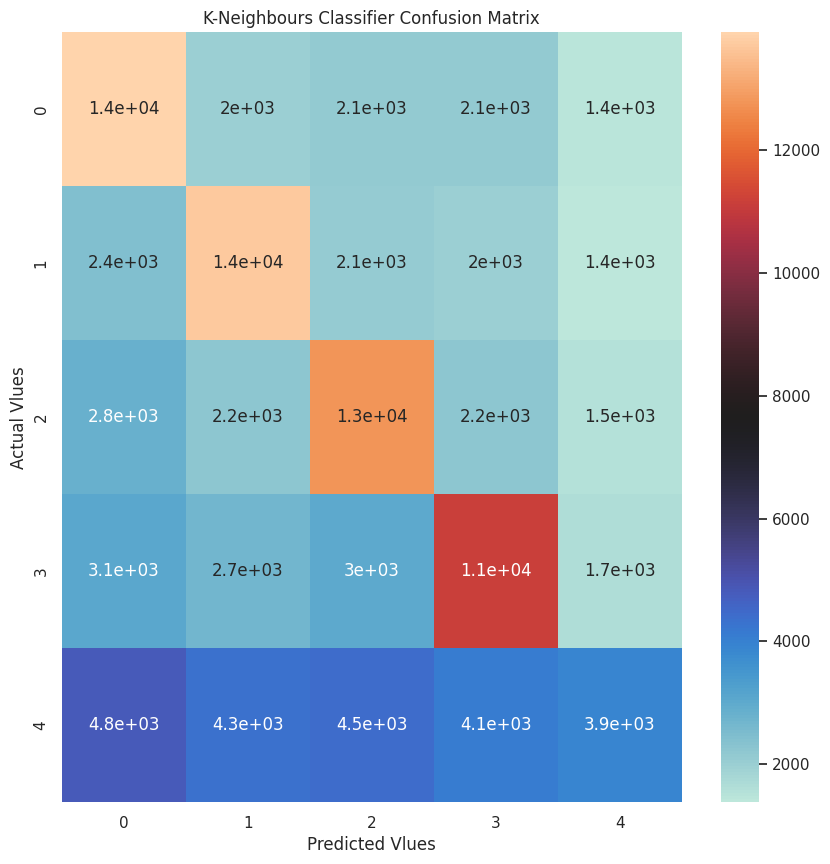

In [ ]:
plt.figure(figsize=(10,10))
plt.title("K-Neighbours Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot = True, cmap ='icefire')
plt.ylabel("Actual Vlues")
plt.xlabel("Predicted Vlues")
plt.show()

####Hyperparamter Tuning

In [ ]:
def objective(trial):

    leaf_size =  trial.suggest_int('leaf_size', 1, 50)
    n_neighbors = trial.suggest_int('n_neighbors', 1, 100)
    p = trial.suggest_int('p', 1, 2)

    knc = KNeighborsClassifier(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)

    score = cross_val_score(knc, X_train, y_train, n_jobs = -1, cv = 5)

    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 15)

[I 2023-04-15 03:53:16,604] A new study created in memory with name: no-name-54ac7694-ae10-4bee-865c-b344024333dc
[I 2023-04-15 03:53:32,649] Trial 0 finished with value: 0.3495033650307937 and parameters: {'leaf_size': 15, 'n_neighbors': 78, 'p': 2}. Best is trial 0 with value: 0.3495033650307937.
[I 2023-04-15 03:53:45,238] Trial 1 finished with value: 0.42533543354336845 and parameters: {'leaf_size': 48, 'n_neighbors': 24, 'p': 2}. Best is trial 1 with value: 0.42533543354336845.
[I 2023-04-15 03:53:57,651] Trial 2 finished with value: 0.38391236710932647 and parameters: {'leaf_size': 50, 'n_neighbors': 48, 'p': 2}. Best is trial 1 with value: 0.42533543354336845.
[I 2023-04-15 03:54:09,580] Trial 3 finished with value: 0.40480404040901946 and parameters: {'leaf_size': 32, 'n_neighbors': 42, 'p': 1}. Best is trial 1 with value: 0.42533543354336845.
[I 2023-04-15 03:54:19,537] Trial 4 finished with value: 0.4434178360626845 and parameters: {'leaf_size': 13, 'n_neighbors': 16, 'p': 2}

In [ ]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.6172551309949047
Best hyperparameters: {'leaf_size': 4, 'n_neighbors': 1, 'p': 1}


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
best_params = trial.params
best_params

{'leaf_size': 4, 'n_neighbors': 1, 'p': 1}

In [ ]:
model_knn_hp = KNeighborsClassifier(**best_params, n_jobs = -1)
model_knn_hp.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=4, n_jobs=-1, n_neighbors=1, p=1)

In [ ]:
y_pred_knn_hp = model_knn_hp.predict(X_test)

In [ ]:
train_acc_knn_hp = model_knn_hp.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc_knn_hp*100))

The Accuracy for Training Set is 99.84904731067067


In [ ]:
test_acc_knn_hp = accuracy_score(y_test, y_pred_knn_hp)
print("The Accuracy for Test Set is {}".format(test_acc_knn_hp*100))

The Accuracy for Test Set is 64.15496152813401


In [ ]:
print(classification_report(y_test, y_pred_knn_hp))

              precision    recall  f1-score   support

           1       0.70      0.72      0.71     21600
           2       0.70      0.74      0.72     21600
           3       0.66      0.71      0.68     21600
           4       0.63      0.68      0.65     21601
           5       0.48      0.37      0.42     21600

    accuracy                           0.64    108001
   macro avg       0.63      0.64      0.64    108001
weighted avg       0.63      0.64      0.64    108001



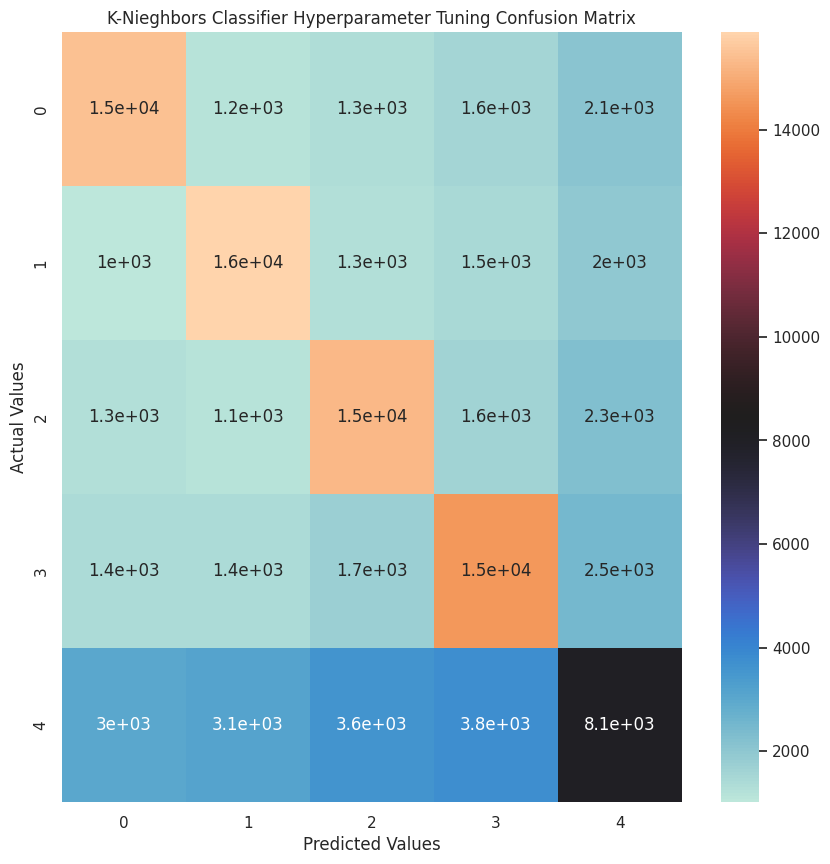

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("K-Nieghbors Classifier Hyperparameter Tuning Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred_knn_hp), annot = True, cmap ='icefire')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [ ]:
input_data = [('1d47144362c14e94ccdd213e8ec277d5',	1.0,'santo antonio de jesus',	'BA', 'Slow','On Time', 'Cheap', False,	False, 'Heavy')]

In [ ]:
ex = pd.DataFrame(input_data, columns = ['customer_unique_id', 'order_item_id', 'customer_city', 'customer_state', 'delivery_time_class', 'seller_response', 'payment_value_class', 'customer_debt', 'cash_customer_payment', 'product_width_class'])
ex

,customer_unique_id,order_item_id,customer_city,customer_state,delivery_time_class,seller_response,payment_value_class,customer_debt,cash_customer_payment,product_width_class
0,1d47144362c14e94ccdd213e8ec277d5,1.0,santo antonio de jesus,BA,Slow,On Time,Cheap,False,False,Heavy


In [ ]:
scale_ex = new_pipe.transform(ex)

In [ ]:
prdctn = model_knn_hp.predict(scale_ex)
prdctn

array([5])

##6. Save Model


In [ ]:
filename = 'cust_satis_model.p'

In [ ]:
pickle.dump(model_knn, open(filename, 'wb'))

##7. Deployment
#####Note: Deployment should be done on local machine but for development processes it is done here.

In [ ]:
%%writefile app.py

import numpy as np
import pandas as pd
import streamlit as st
import pickle

pickle_in = open('prop_churn_model.p', "rb")
model = pickle.load(pickle_in)

def welcome():
    return "Hello! Welcome to Upstore!"


def predict_op(customer_unique_id, order_item_id, review_score, delivery_time_class, seller_response, payment_value_class, customer_debt, cash_customer_payment, product_width_class):


    customer_unique_id = float(customer_unique_id)
    order_item_id = float(order_item_id)
    delivery_time_class = float(0 if delivery_time_class == 'Slow' else 1 if delivery_time_class == 'Fast' else 2 )
    seller_response =  float(0 if seller_response == 'Slow' else 1 if seller_response == 'Fast' else 2 )
    payment_value_class =  float(0 if payment_value_class == 'Cheap' else 1 if payment_value_class == 'Medium' else 2 )
    customer_debt =  bool(False if customer_debt == 'False' else True)
    cash_customer_payment = bool(False if cash_customer_payment == 'False' else True)
    product_width_class = float(0 if product_width_class == 'Light' else 1 if product_width_class == 'Medium' else 2 )
    prediction = model.predict([[customer_unique_id, order_item_id,  review_score, delivery_time_class, seller_response, payment_value_class, customer_debt, cash_customer_payment, product_width_class]])
    print(prediction)
    return prediction

def main():
    st.title("Welcome to Upstore")
    st.text("Let's Find out the Customer Satisfaction for a particular customer.")
    st.text("Here the model will predict how satisfied a customer through ratings.")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Propensity to Churn App </h2>
    </div>
    """
    st.markdown(html_temp,  unsafe_allow_html=True)
    customer_unique_id = st.text_input("Customer ID")
    order_item_id = st.text_input("Item Orders")
    delivery_time_class = st.selectbox("Speed of the Delivery", ('Slow', 'Fast', 'Medium'))
    seller_response = st.selectbox("Seller Response", ('Slow', 'Fast', 'On Time'))
    payment_value_class = st.selectbox("Item Purchased", ('Cheap', 'Medium', 'Expensive'))
    customer_debt = st.selectbox("Paid in Installments?", ('True', 'False'))
    cash_customer_payment = st.selectbox("Paid in Boleto/Debit Card?", ('True', 'False'))
    product_width_class = st.selectbox("Class of the Product", ('Light', 'Medium', 'Heavy'))
    result=""
    if st.button("Predict"):
        result=predict_op(customer_unique_id, order_item_id, delivery_time_class, seller_response, payment_value_class, customer_debt, cash_customer_payment, product_width_class)
    st.success('The probability to churn for this customer is {}'.format(result * 100))
    if st.button("About"):
        st.text("Made with love by the students of NMIMS Indore <3")


if __name__ == '__main__':
  main()

Writing app.py


In [ ]:
!ls

app.py				  olist_orders_dataset.csv
catboost_info			  olist_products_dataset.csv
olist_customers_dataset.csv	  olist_sellers_dataset.csv
olist_order_items_dataset.csv	  product_category_name_translation.csv
olist_order_payments_dataset.csv  prop_churn_model.p
olist_order_reviews_dataset.csv   sample_data


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] / loadDep:strip-ansi: sill resolveWithNewModule wrap-ansi@


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.115.29:8501

npx: installed 22 in 3.067s
your url is: https://bumpy-radios-thank-34-125-115-29.loca.lt
  Stopping...
^C
